## Creating model for the Prediction of Red Wine Quality taking it as Regression Problem

In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.style.use('fivethirtyeight')

D:\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
df=pd.read_csv("winequality-red.csv")

In [5]:
#checking the dataframe head
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
#Here we don't have any null values. Lets check the outlier values if any

In [8]:
features=[features for features in df.columns]
features

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

### Exploratory Data Analysis

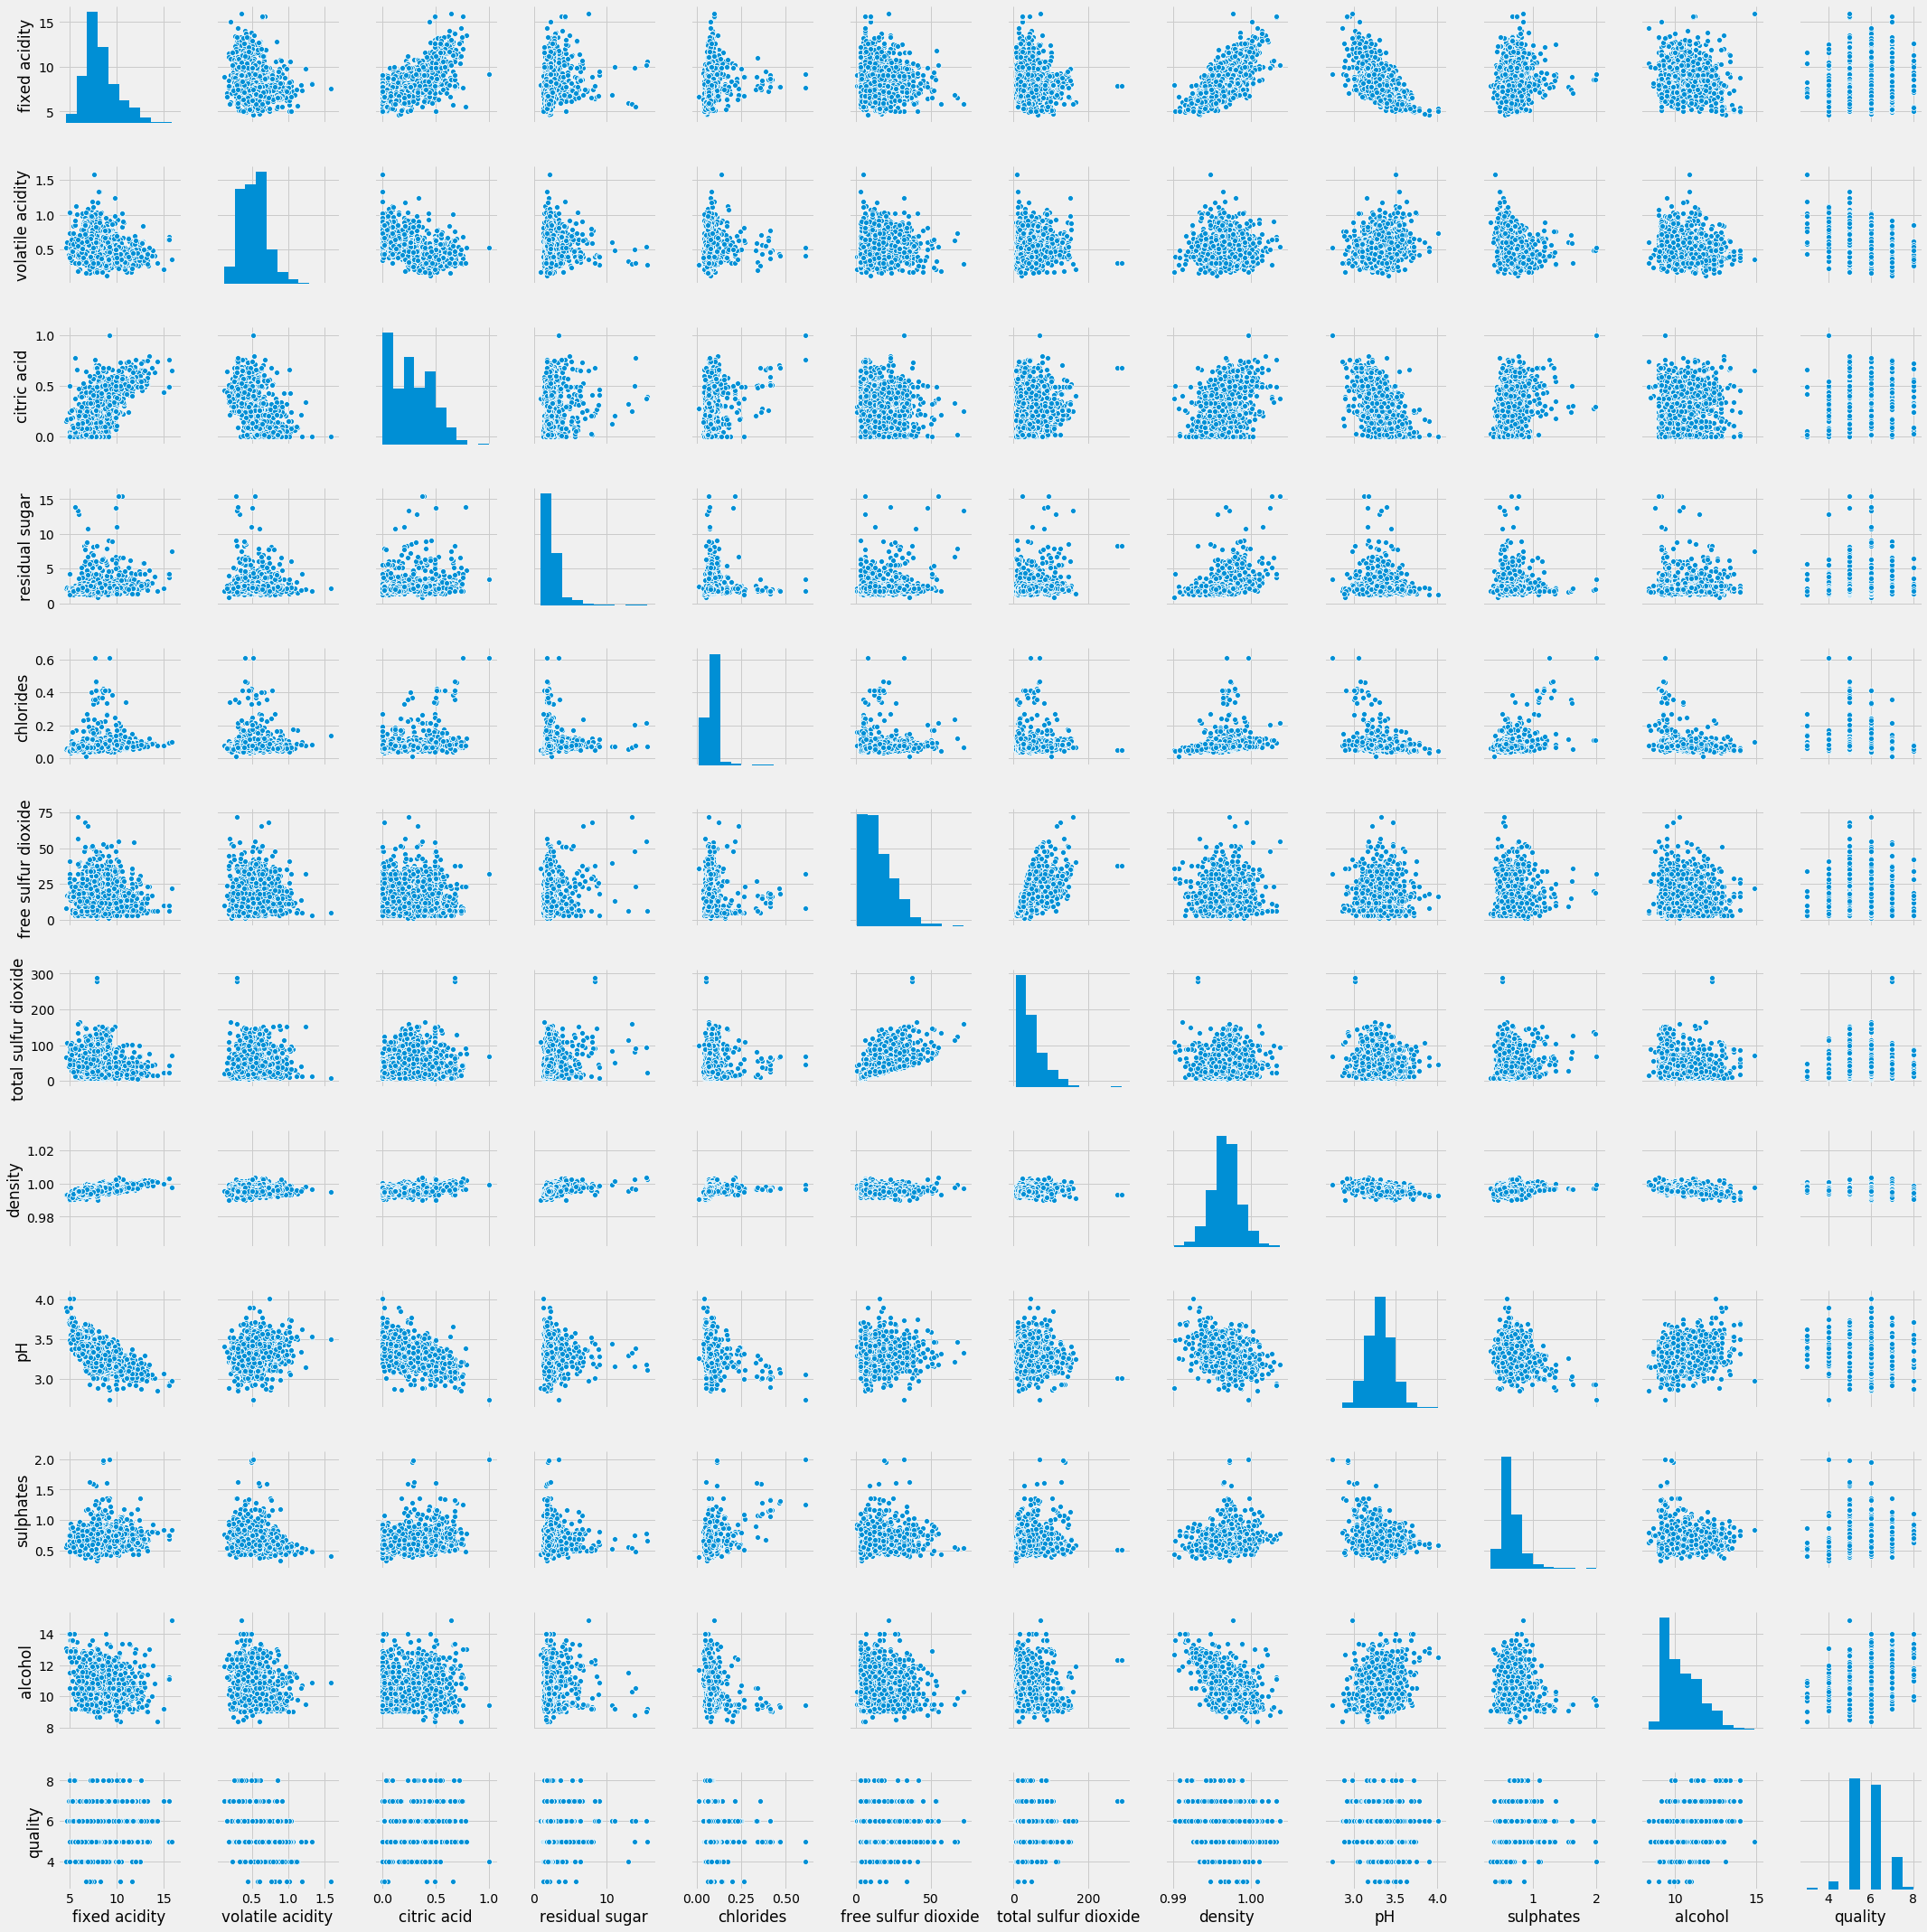

In [9]:
sns.pairplot(df)

### Checking the correlation

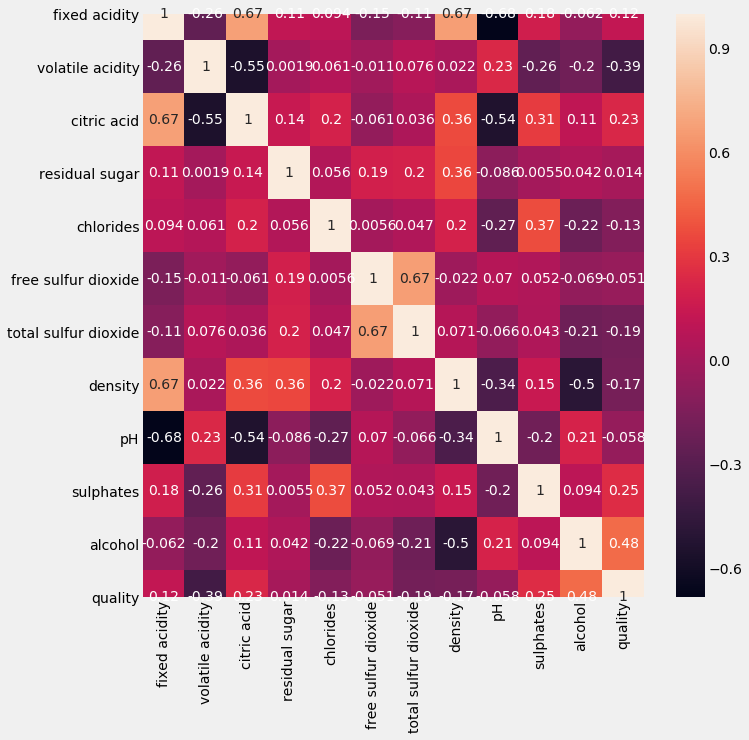

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [11]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


#### We can see little positive correlation between density and fixed acidity and negative correlation between ph and fixed acidity

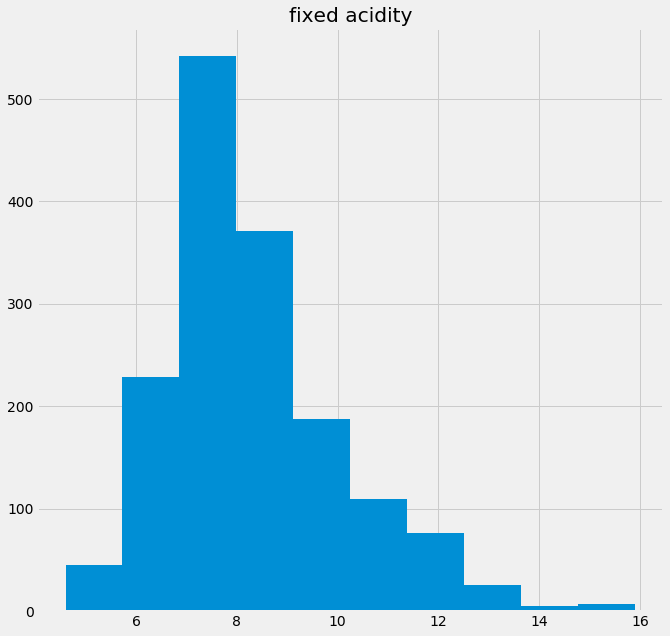

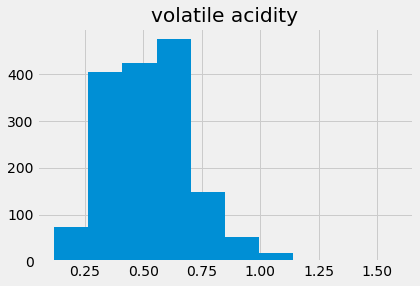

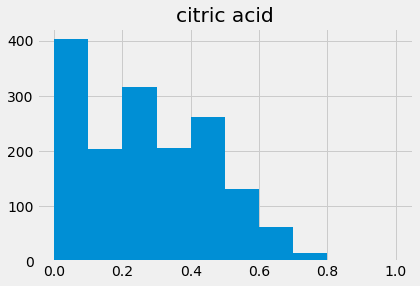

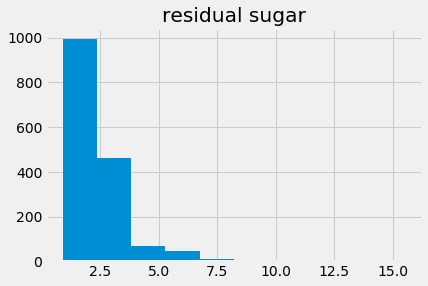

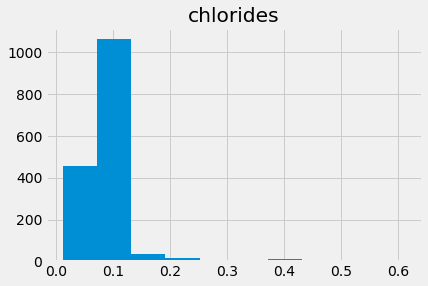

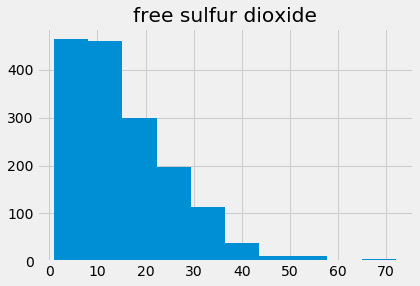

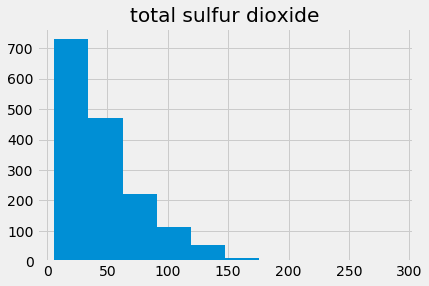

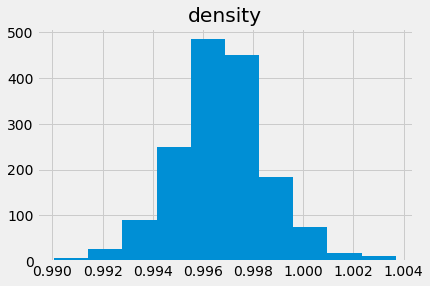

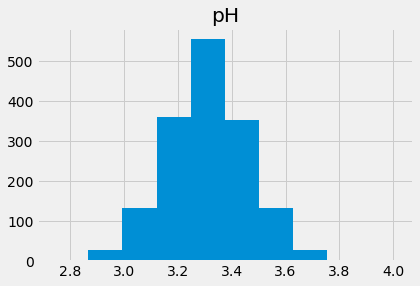

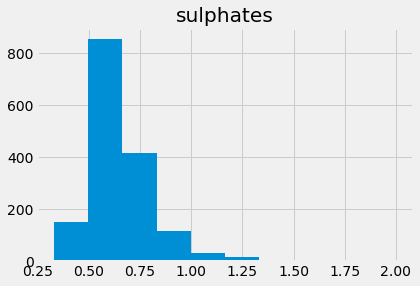

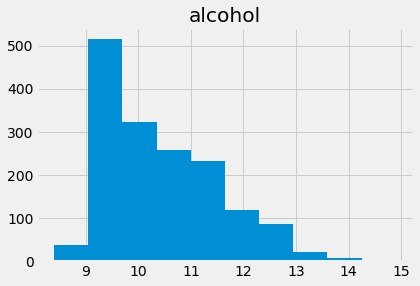

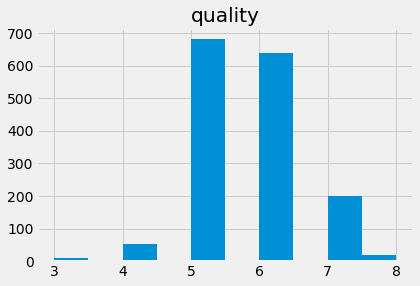

In [12]:
plt.figure(figsize=(10,10))
for feature in (features):
        plt.hist(df[feature])
        plt.title(feature)
        plt.show()

In [13]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


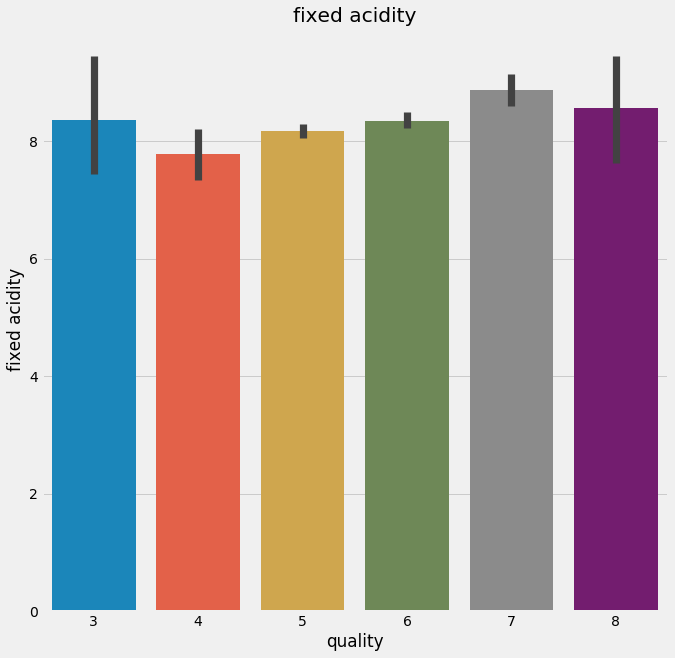

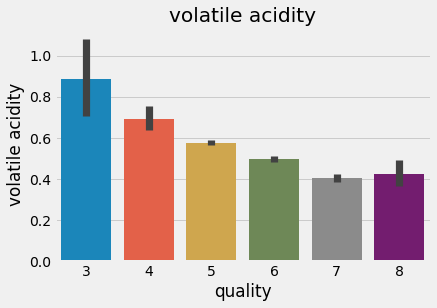

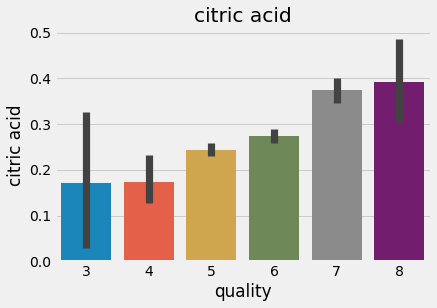

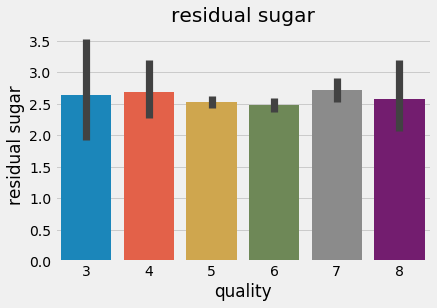

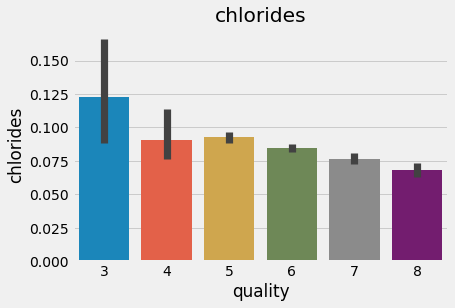

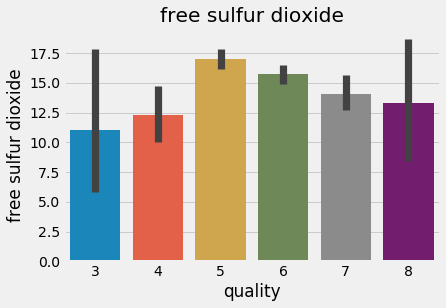

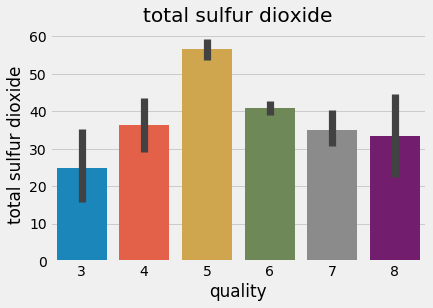

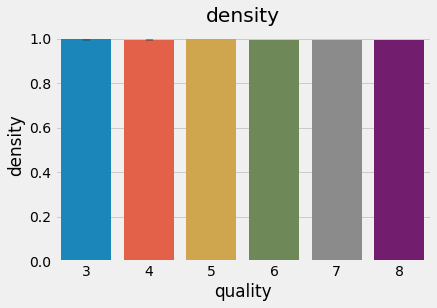

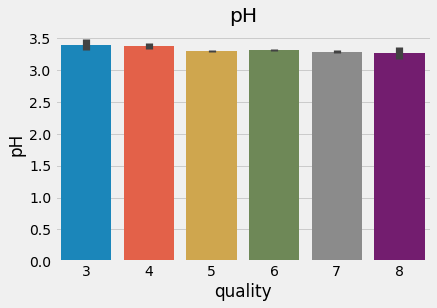

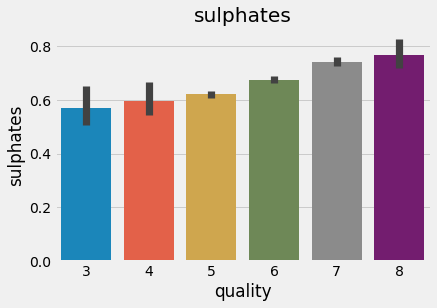

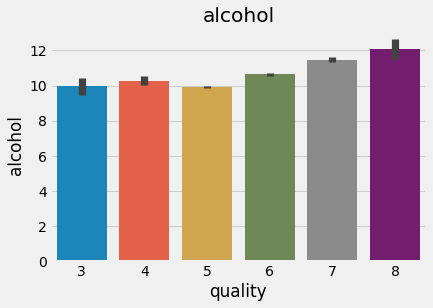

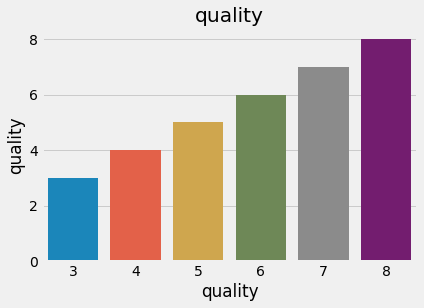

In [14]:
plt.figure(figsize=(10,10))
for feature in (features):
        sns.barplot(y=df[feature],x=df['quality'])
        plt.title(feature)
        plt.show()

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X=df.drop(['quality'],axis=1)
y=df['quality']

In [18]:
ms=StandardScaler()
X= ms.fit_transform(X)

In [19]:
### Splitting the data into train and test

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

### Random Forest Algorithm

In [21]:
from sklearn.ensemble import RandomForestRegressor

In [22]:
rf=RandomForestRegressor()

In [23]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [24]:
from sklearn import metrics

In [25]:
print("Score on train set:  {}".format(rf.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.9285503195834106


In [26]:
print("Score on test set: {}".format(rf.score(X_test, y_test)))

Coefficient of determination R^2 <-- on test set: 0.407847404196631


In [27]:
prediction=rf.predict(X_test)

In [28]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 0.46847916666666667
MSE: 0.41742645833333325
RMSE: 0.6460854884094931


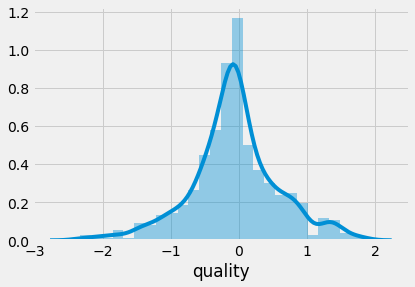

In [29]:
sns.distplot(y_test-prediction)

## Using Hyperparameters in RandomForest

In [30]:
randomforest=RandomForestRegressor()

In [31]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]



In [32]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [33]:
from sklearn.model_selection import RandomizedSearchCV

In [34]:
rf_random = RandomizedSearchCV(estimator = randomforest, param_distributions = random_grid,scoring='root_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=101, n_jobs = 1)

In [35]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] n_estimators=700, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=25 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=700, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=25, total=   3.8s
[CV] n_estimators=700, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=25 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s remaining:    0.0s


[CV]  n_estimators=700, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=25, total=   3.8s
[CV] n_estimators=700, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=25 
[CV]  n_estimators=700, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=25, total=   4.7s
[CV] n_estimators=700, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=25 
[CV]  n_estimators=700, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=25, total=   4.5s
[CV] n_estimators=700, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=25 
[CV]  n_estimators=700, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=25, total=   4.1s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, total=   1.2s
[CV] n_estimators=200, min_samples_split=5, m

[CV]  n_estimators=700, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=15, total=   1.9s
[CV] n_estimators=700, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=15 
[CV]  n_estimators=700, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=15, total=   2.0s
[CV] n_estimators=700, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=15 
[CV]  n_estimators=700, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=15, total=   1.9s
[CV] n_estimators=700, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=15 
[CV]  n_estimators=700, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=15, total=   1.9s
[CV] n_estimators=700, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=15 
[CV]  n_estimators=700, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=15, total=   1.9s
[CV] n_estimators=600, min_samples_split=10

[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   1.3s
[CV] n_estimators=300, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=20, total=   0.8s
[CV] n_estimators=300, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=20, total=   0.8s
[CV] n_estimators=300, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=20, total=   0.8s
[CV] n_estimators=300, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=20, total=   0.8s
[CV] n_estimators=300, min_samples_

[CV]  n_estimators=200, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   0.5s
[CV] n_estimators=200, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  n_estimators=200, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   0.5s
[CV] n_estimators=700, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=15 
[CV]  n_estimators=700, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=15, total=   1.8s
[CV] n_estimators=700, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=15 
[CV]  n_estimators=700, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=15, total=   1.8s
[CV] n_estimators=700, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=15 
[CV]  n_estimators=700, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=15, total=   1.8s
[CV] n_estimators=700, min_samples_sp

[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.6s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.6s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.5s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=30 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=30, total=   0.5s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=30 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=30, total=   0.5s
[CV] n_estimators=200, min_samples_split=2, min_

[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=5, total=   3.4s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=5 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=5, total=   2.9s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=5 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=5, total=   3.2s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=15 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=15, total=   1.5s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=15 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=15, total=   1.3s
[CV] n_estimators=400, min_samples_split=10, min

[CV]  n_estimators=1200, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=30, total=   3.4s
[CV] n_estimators=1200, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1200, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=30, total=   3.6s
[CV] n_estimators=1200, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1200, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=30, total=   3.4s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=5 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=5, total=   0.4s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=5 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=5, total=   0.4s
[CV] n_estimators=100, min_samples_sp

[CV]  n_estimators=1100, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=30, total=   6.7s
[CV] n_estimators=1100, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=30 
[CV]  n_estimators=1100, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=30, total=   6.7s
[CV] n_estimators=1100, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=30 
[CV]  n_estimators=1100, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=30, total=   6.5s
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=5 
[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=5, total=   1.2s
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=5 
[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=5, total=   1.2s
[CV] n_estimators=300, min_samples_split=2

[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.2s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.2s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.2s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.2s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=30, total=   3.0s
[CV] n_estimators=500, min_samples_split=5, min_samples_lea

[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=10, total=   3.2s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=10, total=   3.2s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=10, total=   3.3s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=10, total=   3.2s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=10, total=   3.3s
[CV] n_estimators=700, min_samples_split=15

[CV]  n_estimators=1200, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   2.9s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=5 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=5, total=   2.2s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=5 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=5, total=   2.3s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=5 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=5, total=   3.5s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=5 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=5, total=   3.1s
[CV] n_estimators=600, min_samples_split=

[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=5, total=   0.4s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=5 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=5, total=   0.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=5, total=   3.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=5, total=   3.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=5, total=   3.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=

[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=20, total=   2.8s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=20, total=   2.9s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=20, total=   2.7s
[CV] n_estimators=1100, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=15, total=   4.3s
[CV] n_estimators=1100, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=15, total=   4.2s
[CV] n_estimators=1100, m

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 19.5min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=101, scoring='neg_mean_squared_error',
                   verbose=2)

In [38]:
prediction=rf_random.predict(X_test)

In [39]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 0.4629291666666667
MSE: 0.392678475
RMSE: 0.6266406266752899


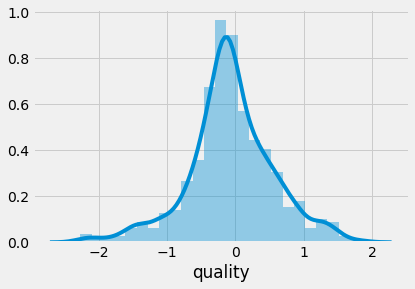

In [40]:
sns.distplot(y_test-prediction)

### XGBOOST

In [41]:
from xgboost import XGBRFRegressor

In [42]:
xgb=XGBRFRegressor()

In [43]:
xgb.fit(X_train,y_train)

[21:51:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRFRegressor()

In [45]:
print("Score on train set: {}".format(xgb.score(X_train, y_train)))

Score on train set: 0.33065938472490386


In [46]:
print("Score on test set: {}".format(xgb.score(X_test, y_test)))

Score on test set: 0.2871980981995309


In [47]:
prediction=xgb.predict(X_test)

In [48]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 0.5693361053864161
MSE: 0.5024758406372613
RMSE: 0.7088553030324745


### XGBoost with Hyperparameter Tuning

In [49]:
# Number of trees in XGBoost
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
learning_rate = ['0.05','0.1', '0.2','0.3','0.5','0.6']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
subsample=[0.7,0.6,0.8]
# Minimum number of samples required at each leaf node
min_child_weight=[3,4,5,6,7]


In [50]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
               'subsample': subsample,
               'min_child_weight': min_child_weight}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'learning_rate': ['0.05', '0.1', '0.2', '0.3', '0.5', '0.6'], 'max_depth': [5, 10, 15, 20, 25, 30], 'subsample': [0.7, 0.6, 0.8], 'min_child_weight': [3, 4, 5, 6, 7]}


In [51]:
xg=XGBRFRegressor()

In [52]:
xg_random = RandomizedSearchCV(estimator = xg, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [53]:
xg_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3 
[22:11:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3, total=   0.6s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3 
[22:11:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3, total=   0.6s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3 
[22:11:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3, total=   0.5s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3 
[22:11:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3, total=   0.5s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3 
[22:11:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/obj

[CV]  subsample=0.6, n_estimators=500, min_child_weight=6, max_depth=5, learning_rate=0.3, total=   0.3s
[CV] subsample=0.6, n_estimators=500, min_child_weight=6, max_depth=5, learning_rate=0.3 
[22:11:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=500, min_child_weight=6, max_depth=5, learning_rate=0.3, total=   0.2s
[CV] subsample=0.6, n_estimators=500, min_child_weight=6, max_depth=5, learning_rate=0.3 
[22:11:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=500, min_child_weight=6, max_depth=5, learning_rate=0.3, total=   0.2s
[CV] subsample=0.6, n_estimators=500, min_child_weight=6, max_depth=5, learning_rate=0.3 
[22:11:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regre

[CV]  subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.2, total=   0.5s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.2 
[22:11:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.2, total=   0.5s
[CV] subsample=0.7, n_estimators=800, min_child_weight=5, max_depth=15, learning_rate=0.3 
[22:11:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=800, min_child_weight=5, max_depth=15, learning_rate=0.3, total=   0.4s
[CV] subsample=0.7, n_estimators=800, min_child_weight=5, max_depth=15, learning_rate=0.3 
[22:11:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective

[CV]  subsample=0.7, n_estimators=1100, min_child_weight=7, max_depth=30, learning_rate=0.5, total=   0.6s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=7, max_depth=30, learning_rate=0.5 
[22:11:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=1100, min_child_weight=7, max_depth=30, learning_rate=0.5, total=   0.5s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=7, max_depth=30, learning_rate=0.5 
[22:11:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=1100, min_child_weight=7, max_depth=30, learning_rate=0.5, total=   0.5s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=7, max_depth=30, learning_rate=0.5 
[22:11:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/obj

[CV]  subsample=0.8, n_estimators=500, min_child_weight=3, max_depth=10, learning_rate=0.3, total=   0.3s
[CV] subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=30, learning_rate=0.5 
[22:11:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=30, learning_rate=0.5, total=   0.2s
[CV] subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=30, learning_rate=0.5 
[22:11:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=30, learning_rate=0.5, total=   0.2s
[CV] subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=30, learning_rate=0.5 
[22:11:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective

[CV]  subsample=0.6, n_estimators=800, min_child_weight=3, max_depth=30, learning_rate=0.1, total=   0.4s
[CV] subsample=0.6, n_estimators=800, min_child_weight=3, max_depth=30, learning_rate=0.1 
[22:11:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=800, min_child_weight=3, max_depth=30, learning_rate=0.1, total=   0.4s
[CV] subsample=0.6, n_estimators=800, min_child_weight=3, max_depth=30, learning_rate=0.1 
[22:11:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=800, min_child_weight=3, max_depth=30, learning_rate=0.1, total=   0.4s
[CV] subsample=0.7, n_estimators=400, min_child_weight=4, max_depth=30, learning_rate=0.5 
[22:11:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective

[CV]  subsample=0.7, n_estimators=1200, min_child_weight=4, max_depth=5, learning_rate=0.1, total=   0.6s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=4, max_depth=5, learning_rate=0.1 
[22:11:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=1200, min_child_weight=4, max_depth=5, learning_rate=0.1, total=   0.6s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=4, max_depth=5, learning_rate=0.1 
[22:12:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=1200, min_child_weight=4, max_depth=5, learning_rate=0.1, total=   0.6s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=4, max_depth=5, learning_rate=0.1 
[22:12:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective

[CV] subsample=0.7, n_estimators=1200, min_child_weight=6, max_depth=5, learning_rate=0.1 
[22:12:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=1200, min_child_weight=6, max_depth=5, learning_rate=0.1, total=   0.6s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=6, max_depth=5, learning_rate=0.1 
[22:12:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=1200, min_child_weight=6, max_depth=5, learning_rate=0.1, total=   0.6s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=6, max_depth=5, learning_rate=0.1 
[22:12:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_

[CV]  subsample=0.8, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.3, total=   0.4s
[CV] subsample=0.8, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.3 
[22:12:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.3, total=   0.4s
[CV] subsample=0.8, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.3 
[22:12:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.3, total=   0.5s
[CV] subsample=0.6, n_estimators=300, min_child_weight=5, max_depth=5, learning_rate=0.3 
[22:12:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/

[CV]  subsample=0.6, n_estimators=1100, min_child_weight=3, max_depth=5, learning_rate=0.05, total=   0.6s
[CV] subsample=0.6, n_estimators=1100, min_child_weight=3, max_depth=5, learning_rate=0.05 
[22:12:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=1100, min_child_weight=3, max_depth=5, learning_rate=0.05, total=   0.5s
[CV] subsample=0.6, n_estimators=1100, min_child_weight=3, max_depth=5, learning_rate=0.05 
[22:12:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=1100, min_child_weight=3, max_depth=5, learning_rate=0.05, total=   0.5s
[CV] subsample=0.6, n_estimators=1100, min_child_weight=3, max_depth=5, learning_rate=0.05 
[22:12:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/obj

[CV]  subsample=0.6, n_estimators=900, min_child_weight=4, max_depth=10, learning_rate=0.6, total=   0.4s
[CV] subsample=0.6, n_estimators=900, min_child_weight=4, max_depth=10, learning_rate=0.6 
[22:12:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=900, min_child_weight=4, max_depth=10, learning_rate=0.6, total=   0.4s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=20, learning_rate=0.1 
[22:12:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=20, learning_rate=0.1, total=   0.6s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=20, learning_rate=0.1 
[22:12:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/object

[CV]  subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.6, total=   0.0s
[CV] subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.6 
[22:12:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.6, total=   0.1s
[CV] subsample=0.7, n_estimators=900, min_child_weight=6, max_depth=5, learning_rate=0.05 
[22:12:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=900, min_child_weight=6, max_depth=5, learning_rate=0.05, total=   0.5s
[CV] subsample=0.7, n_estimators=900, min_child_weight=6, max_depth=5, learning_rate=0.05 
[22:12:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective

[CV] subsample=0.7, n_estimators=400, min_child_weight=6, max_depth=20, learning_rate=0.1 
[22:12:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=400, min_child_weight=6, max_depth=20, learning_rate=0.1, total=   0.2s
[CV] subsample=0.7, n_estimators=400, min_child_weight=6, max_depth=20, learning_rate=0.1 
[22:12:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=400, min_child_weight=6, max_depth=20, learning_rate=0.1, total=   0.2s
[CV] subsample=0.7, n_estimators=400, min_child_weight=6, max_depth=20, learning_rate=0.1 
[22:12:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_

[CV]  subsample=0.6, n_estimators=600, min_child_weight=4, max_depth=25, learning_rate=0.2, total=   0.3s
[CV] subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.5 
[22:12:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.5, total=   0.1s
[CV] subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.5 
[22:12:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.5, total=   0.1s
[CV] subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.5 
[22:12:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective

[CV]  subsample=0.6, n_estimators=900, min_child_weight=5, max_depth=30, learning_rate=0.6, total=   0.4s
[CV] subsample=0.6, n_estimators=900, min_child_weight=5, max_depth=30, learning_rate=0.6 
[22:13:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=900, min_child_weight=5, max_depth=30, learning_rate=0.6, total=   0.4s
[CV] subsample=0.6, n_estimators=900, min_child_weight=5, max_depth=30, learning_rate=0.6 
[22:13:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=900, min_child_weight=5, max_depth=30, learning_rate=0.6, total=   0.4s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=5, max_depth=10, learning_rate=0.5 
[22:13:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objectiv

[CV]  subsample=0.8, n_estimators=500, min_child_weight=7, max_depth=30, learning_rate=0.5, total=   0.3s
[CV] subsample=0.8, n_estimators=500, min_child_weight=7, max_depth=30, learning_rate=0.5 
[22:13:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=500, min_child_weight=7, max_depth=30, learning_rate=0.5, total=   0.3s
[CV] subsample=0.8, n_estimators=500, min_child_weight=7, max_depth=30, learning_rate=0.5 
[22:13:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=500, min_child_weight=7, max_depth=30, learning_rate=0.5, total=   0.2s
[CV] subsample=0.8, n_estimators=500, min_child_weight=7, max_depth=30, learning_rate=0.5 
[22:13:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective

[CV]  subsample=0.6, n_estimators=600, min_child_weight=6, max_depth=25, learning_rate=0.6, total=   0.3s
[CV] subsample=0.6, n_estimators=600, min_child_weight=6, max_depth=25, learning_rate=0.6 
[22:13:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=600, min_child_weight=6, max_depth=25, learning_rate=0.6, total=   0.3s
[CV] subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=10, learning_rate=0.05 
[22:13:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=10, learning_rate=0.05, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=10, learning_rate=0.05 
[22:13:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/object

[CV]  subsample=0.7, n_estimators=900, min_child_weight=5, max_depth=5, learning_rate=0.05, total=   0.4s
[CV] subsample=0.7, n_estimators=900, min_child_weight=5, max_depth=5, learning_rate=0.05 
[22:13:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=900, min_child_weight=5, max_depth=5, learning_rate=0.05, total=   0.4s
[CV] subsample=0.7, n_estimators=900, min_child_weight=5, max_depth=5, learning_rate=0.05 
[22:13:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=900, min_child_weight=5, max_depth=5, learning_rate=0.05, total=   0.4s
[CV] subsample=0.7, n_estimators=900, min_child_weight=5, max_depth=5, learning_rate=0.05 
[22:13:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective

[CV]  subsample=0.8, n_estimators=1100, min_child_weight=5, max_depth=25, learning_rate=0.6, total=   0.6s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=5, max_depth=25, learning_rate=0.6 
[22:13:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=1100, min_child_weight=5, max_depth=25, learning_rate=0.6, total=   0.6s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=5, max_depth=25, learning_rate=0.6 
[22:13:31] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=1100, min_child_weight=5, max_depth=25, learning_rate=0.6, total=   0.5s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=5, max_depth=25, learning_rate=0.6 
[22:13:31] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/obj

[CV]  subsample=0.6, n_estimators=900, min_child_weight=6, max_depth=5, learning_rate=0.5, total=   0.4s
[CV] subsample=0.6, n_estimators=900, min_child_weight=6, max_depth=5, learning_rate=0.5 
[22:13:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=900, min_child_weight=6, max_depth=5, learning_rate=0.5, total=   0.4s
[CV] subsample=0.6, n_estimators=100, min_child_weight=7, max_depth=5, learning_rate=0.6 
[22:13:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=100, min_child_weight=7, max_depth=5, learning_rate=0.6, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=7, max_depth=5, learning_rate=0.6 
[22:13:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regre

[CV] subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=25, learning_rate=0.3 
[22:13:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=25, learning_rate=0.3, total=   0.2s
[CV] subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=25, learning_rate=0.3 
[22:13:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=25, learning_rate=0.3, total=   0.2s
[CV] subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=25, learning_rate=0.3 
[22:13:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_

[CV]  subsample=0.7, n_estimators=1200, min_child_weight=4, max_depth=15, learning_rate=0.1, total=   0.6s
[CV] subsample=0.8, n_estimators=400, min_child_weight=3, max_depth=20, learning_rate=0.6 
[22:13:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=400, min_child_weight=3, max_depth=20, learning_rate=0.6, total=   0.2s
[CV] subsample=0.8, n_estimators=400, min_child_weight=3, max_depth=20, learning_rate=0.6 
[22:13:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=400, min_child_weight=3, max_depth=20, learning_rate=0.6, total=   0.2s
[CV] subsample=0.8, n_estimators=400, min_child_weight=3, max_depth=20, learning_rate=0.6 
[22:13:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objectiv

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  2.7min finished


RandomizedSearchCV(cv=5, estimator=XGBRFRegressor(), n_iter=100, n_jobs=1,
                   param_distributions={'learning_rate': ['0.05', '0.1', '0.2',
                                                          '0.3', '0.5', '0.6'],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'min_child_weight': [3, 4, 5, 6, 7],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200],
                                        'subsample': [0.7, 0.6, 0.8]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [54]:
xg_random.best_params_

{'subsample': 0.8,
 'n_estimators': 400,
 'min_child_weight': 3,
 'max_depth': 20,
 'learning_rate': '0.6'}

In [57]:
prediction=xg_random.predict(X_test)

In [58]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 2.0261711622277896
MSE: 4.637144464579516
RMSE: 2.1534029963245422


In [ ]:
me